In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Baltimore911.csv', low_memory=False)

In [3]:
# 1. Total number of call instances/rows
total_rows = df.shape[0]
# 2. Total number of call features/columns
total_columns = df.shape[1]

print("Total rows", total_rows)
print("Total columns", total_columns)

Total rows 292761
Total columns 16


In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [8]:
profile.to_widgets()

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('Baltimore911.csv',low_memory=False)

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

df['CrimeTime'] = pd.to_datetime(df['CrimeTime'], format='%H:%M:%S', errors='coerce')

print(df.dtypes)

profile_data = []

for column in df.columns:
    data_type = df[column].dtype
    
    if np.issubdtype(data_type, np.number):
        attribute_type = 'Numeric/Continuous'
        min_val = df[column].min()
        max_val = df[column].max()
        mean_val = df[column].mean()
        median_val = df[column].median()
        std_dev_val = df[column].std()
        unique_values = None  
        top_3_values = None  
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        
    elif data_type == object:
        attribute_type = 'Symbolic/Discrete'
        min_val = max_val = mean_val = median_val = std_dev_val = None  # Not applicable for categorical columns
        unique_values = df[column].nunique()
        top_3_values = df[column].value_counts().head(3)
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        
    else:
        attribute_type = 'Temporal/Spatial'
        min_val = max_val = mean_val = median_val = std_dev_val = unique_values = top_3_values = None  # Not applicable for other data types
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100

    profile_data.append({
        'Column Name': column,
        'Attribute Type': attribute_type,
        'Min': min_val,
        'Max': max_val,
        'Mean': mean_val,
        'Median': median_val,
        'Std Dev': std_dev_val,
        'Unique Values': unique_values,
        'Top 3 Values': top_3_values,
        'Missing %': missing_percentage
    })

profile_df = pd.concat([pd.DataFrame([data]) for data in profile_data], ignore_index=True)

profile_df


CrimeDate          datetime64[ns]
CrimeTime          datetime64[ns]
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Weapon                     object
Post                       object
District                   object
Neighborhood               object
Longitude                 float64
Latitude                  float64
Location 1                float64
Premise                    object
vri_name1                  object
Total Incidents             int64
dtype: object


,Column Name,Attribute Type,Min,Max,Mean,Median,Std Dev,Unique Values,Top 3 Values,Missing %
0,CrimeDate,Temporal/Spatial,None,None,None,None,None,None,None,0.000000
1,CrimeTime,Temporal/Spatial,None,None,None,None,None,None,None,0.008881
2,CrimeCode,Symbolic/Discrete,None,None,None,None,None,81,4E 48061 6D 38977 5A 25351 Name: Crim...,0.000000
3,Location,Symbolic/Discrete,None,None,None,None,None,27064,1500 RUSSELL ST 847 3500 BOSTON ST ...,0.456345
4,Description,Symbolic/Discrete,None,None,None,None,None,14,LARCENY 65508 COMMON ASSAULT 4806...,0.000000
5,Inside/Outside,Symbolic/Discrete,None,None,None,None,None,4,O 128776 I 124454 Outside ...,11.531591
6,Weapon,Symbolic/Discrete,None,None,None,None,None,5,FIREARM 29036 OTHER 17313 KNIFE 1...,78.982173
7,Post,Symbolic/Discrete,None,None,None,None,None,133,114 5227 913 4977 111 4915 Name: Post...,0.811584
8,District,Symbolic/Discrete,None,None,None,None,None,10,NORTHEAST 44207 SOUTHEAST 41816 CENTRAL ...,0.000000
9,Neighborhood,Symbolic/Discrete,None,None,None,None,None,278,DOWNTOWN 9312 FRANKFORD 6922 BE...,3.587910


### Written analysis of the output:

#### (FIXED) Data Types and Attribute Types:

Most columns are of the "Symbolic/Discrete" attribute type, indicating categorical or textual data.
Two columns, "Longitude" and "Latitude," are of the "Numeric/Continuous" attribute type, representing geographical coordinates.
The "Total Incidents" column appears to be a numeric attribute, but itonly has '1' in all the entries, thus making it of no use in our analysis.


#### Missing Values:
The "Location 1" column has 100% missing values, meaning it contains no useful information. We may consider dropping this column from analysis.
The "Weapon" column has a high percentage (approximately 79%) of missing values.

#### Categorical Columns:
Many columns such as "CrimeCode," "Description," "Inside/Outside," "Premise," "vri_name1," and "District" have a significant number of unique values, indicating diversity in the categories within these columns.
The "Neighborhood" column has 3.59% missing values, which may need to be handled appropriately in our analysis.

#### (FIXED)  Temporal/Spatial Columns:
The "CrimeDate" column is symbolic/discrete, representing dates. However, it appears that it's not parsed as dates in the current profile, which could be useful for temporal analysis.I fixed this so that both of these columns are read as date/time column.

#### Geographical Coordinates:
The "Longitude" and "Latitude" columns represent geographical coordinates. We can use information to perform spatial analysis and visualize the data on maps.

#### High no. of distinct values:
Some columns, like "Location" and "Neighborhood," have a many distinct values. This could make it challenging to work with these columns directly for analysis. Aggregation or grouping may be necessary.

#### Post Column:
The "Post" column represents a district identifier and has 0.81% missing values. This column could be useful for analyzing the distribution of incidents across different districts.

In summary, this initial data profile provides valuable insights into the dataset, including data types, missing values, and unique values. To proceed with your data analysis, you should consider handling missing values, converting date and time columns to appropriate formats, and exploring patterns and relationships within the data. Additionally, understanding the nature of the "Weapon" column's missing values is crucial for any analysis involving that attribute.

In [11]:
filtered_df = df.copy()
filtered_df.drop(columns=['Total Incidents'], inplace=True)
filtered_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1
0,2020-02-08,1900-01-01 02:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1
1,2020-02-08,1900-01-01 06:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN
2,2020-02-08,1900-01-01 09:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN
3,2020-02-08,1900-01-01 09:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN
4,2020-02-08,1900-01-01 17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,1978-01-01,1900-01-01 10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,NaN,ROW/TOWNHOUSE-OCC,NaN
292757,1977-05-01,1900-01-01 00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-76.626880,39.328817,NaN,ROW/TOWNHOUSE-OCC,NaN
292758,1975-06-01,1900-01-01 00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-76.691297,39.289582,NaN,OTHER - INSIDE,NaN
292759,1969-07-20,1900-01-01 21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,NaN,NaN


## 2. Temporal patterns 

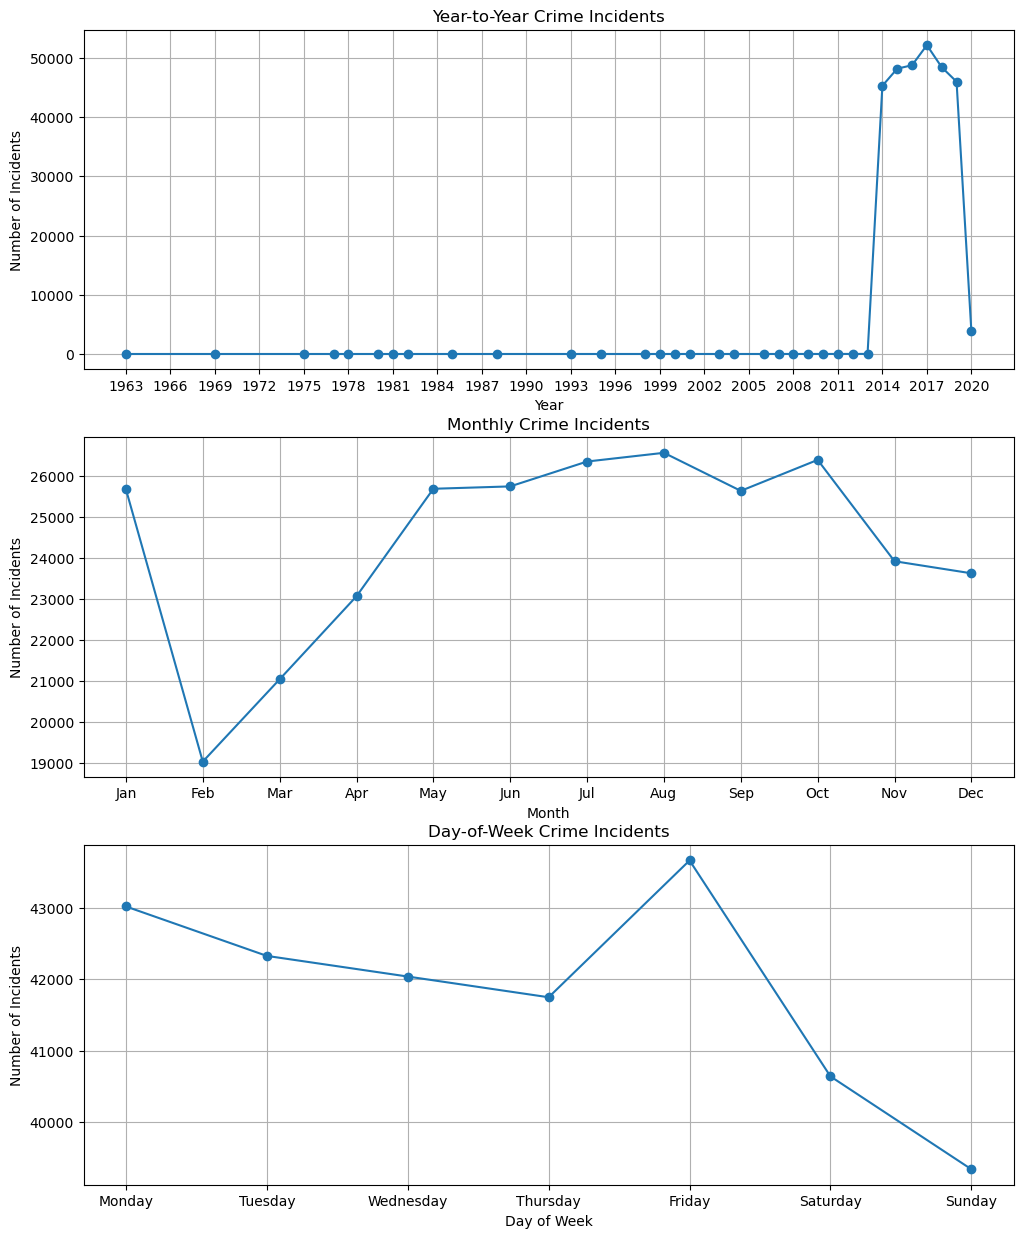

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Convert "CrimeDate" column to datetime
filtered_df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of week from the "CrimeDate" column
filtered_df['Year'] = filtered_df['CrimeDate'].dt.year
filtered_df['Month'] = filtered_df['CrimeDate'].dt.month
filtered_df['DayOfWeek'] = filtered_df['CrimeDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by year and count incidents
yearly_crime = filtered_df.groupby('Year').size()

# Group by month and count incidents
monthly_crime = filtered_df.groupby('Month').size()

# Group by day of week and count incidents
day_of_week_crime = filtered_df.groupby('DayOfWeek').size()

# Rename day of week labels for the plot
day_of_week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create subplots for year-to-year, monthly, and day-of-week patterns
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Year-to-Year Pattern
axes[0].plot(yearly_crime.index, yearly_crime.values, marker='o', linestyle='-')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')
axes[0].set_title('Year-to-Year Crime Incidents')
axes[0].grid()
x_ticks = range(int(min(yearly_crime.index)), int(max(yearly_crime.index)) + 1, 3)
axes[0].set_xticks(x_ticks)
axes[0].set_xticklabels(x_ticks)

# Monthly Pattern
axes[1].plot(monthly_crime.index, monthly_crime.values, marker='o', linestyle='-')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].set_title('Monthly Crime Incidents')
axes[1].grid()

# Day-of-Week Pattern
axes[2].plot(day_of_week_crime.index, day_of_week_crime.values, marker='o', linestyle='-')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Number of Incidents')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(day_of_week_labels)
axes[2].set_title('Day-of-Week Crime Incidents')
axes[2].grid()

plt.show()


In [13]:
filtered_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Year,Month,DayOfWeek
0,2020-02-08,1900-01-01 02:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,2020,2,5
1,2020-02-08,1900-01-01 06:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,2020,2,5
2,2020-02-08,1900-01-01 09:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,2020,2,5
3,2020-02-08,1900-01-01 09:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,2020,2,5
4,2020-02-08,1900-01-01 17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,2020,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292756,1978-01-01,1900-01-01 10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-76.582056,39.340492,NaN,ROW/TOWNHOUSE-OCC,NaN,1978,1,6
292757,1977-05-01,1900-01-01 00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-76.626880,39.328817,NaN,ROW/TOWNHOUSE-OCC,NaN,1977,5,6
292758,1975-06-01,1900-01-01 00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-76.691297,39.289582,NaN,OTHER - INSIDE,NaN,1975,6,6
292759,1969-07-20,1900-01-01 21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-76.635300,39.358898,NaN,NaN,NaN,1969,7,6


## 3. Distribution of crime type 

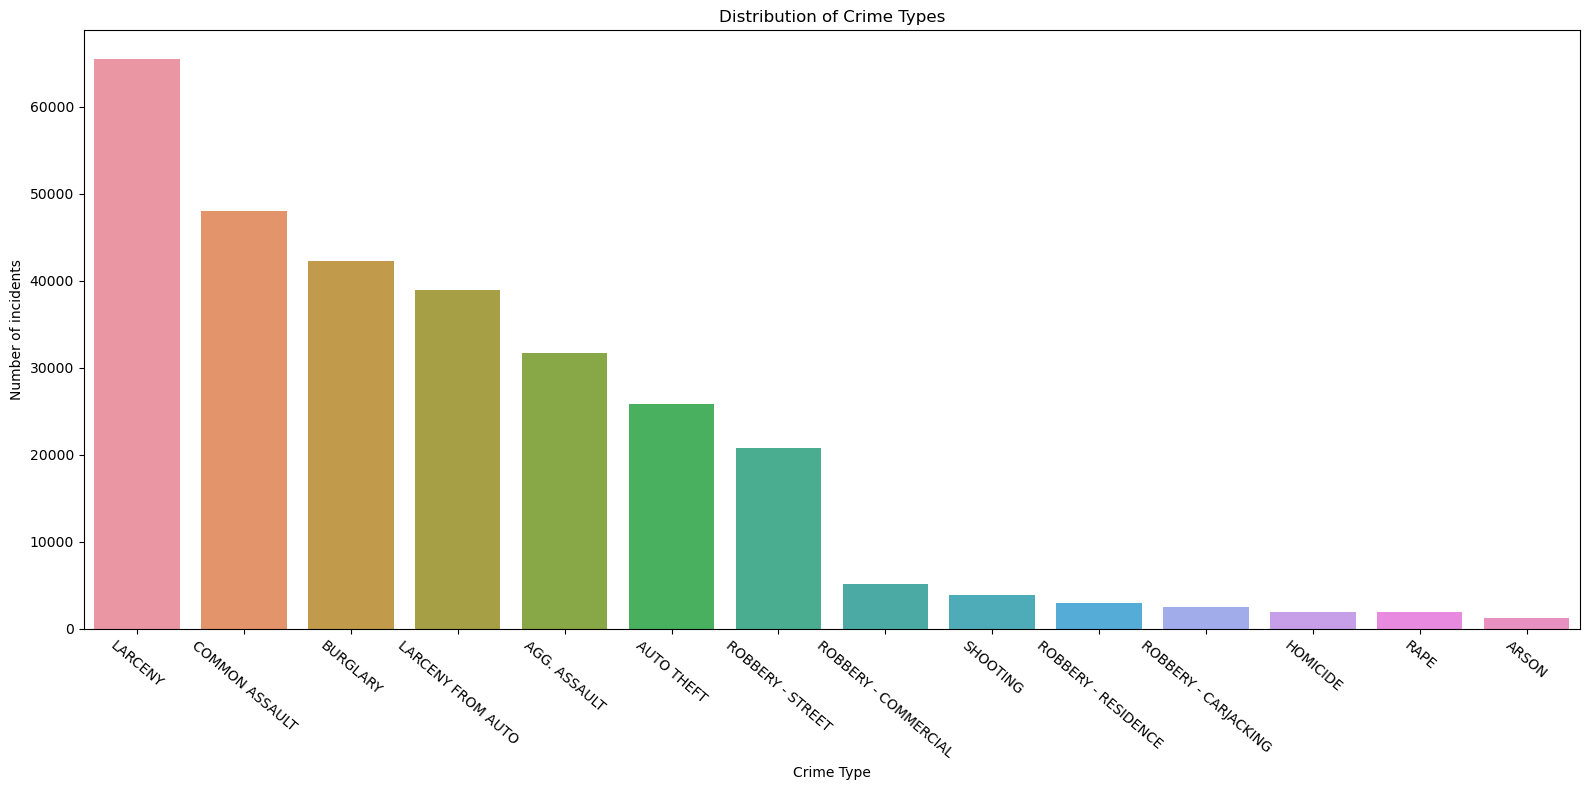

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.countplot(data=filtered_df, x='Description', order=df['Description'].value_counts().index)
plt.xticks(rotation=-40)
plt.xlabel('Crime Type')
plt.ylabel('Number of incidents')
plt.title('Distribution of Crime Types')
plt.tight_layout()
plt.show()


## 4. Crime type distribution temporal 

/var/folders/qg/zknj8z4j47b2wr38lyvvhwh80000gn/T/ipykernel_80647/3264861622.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


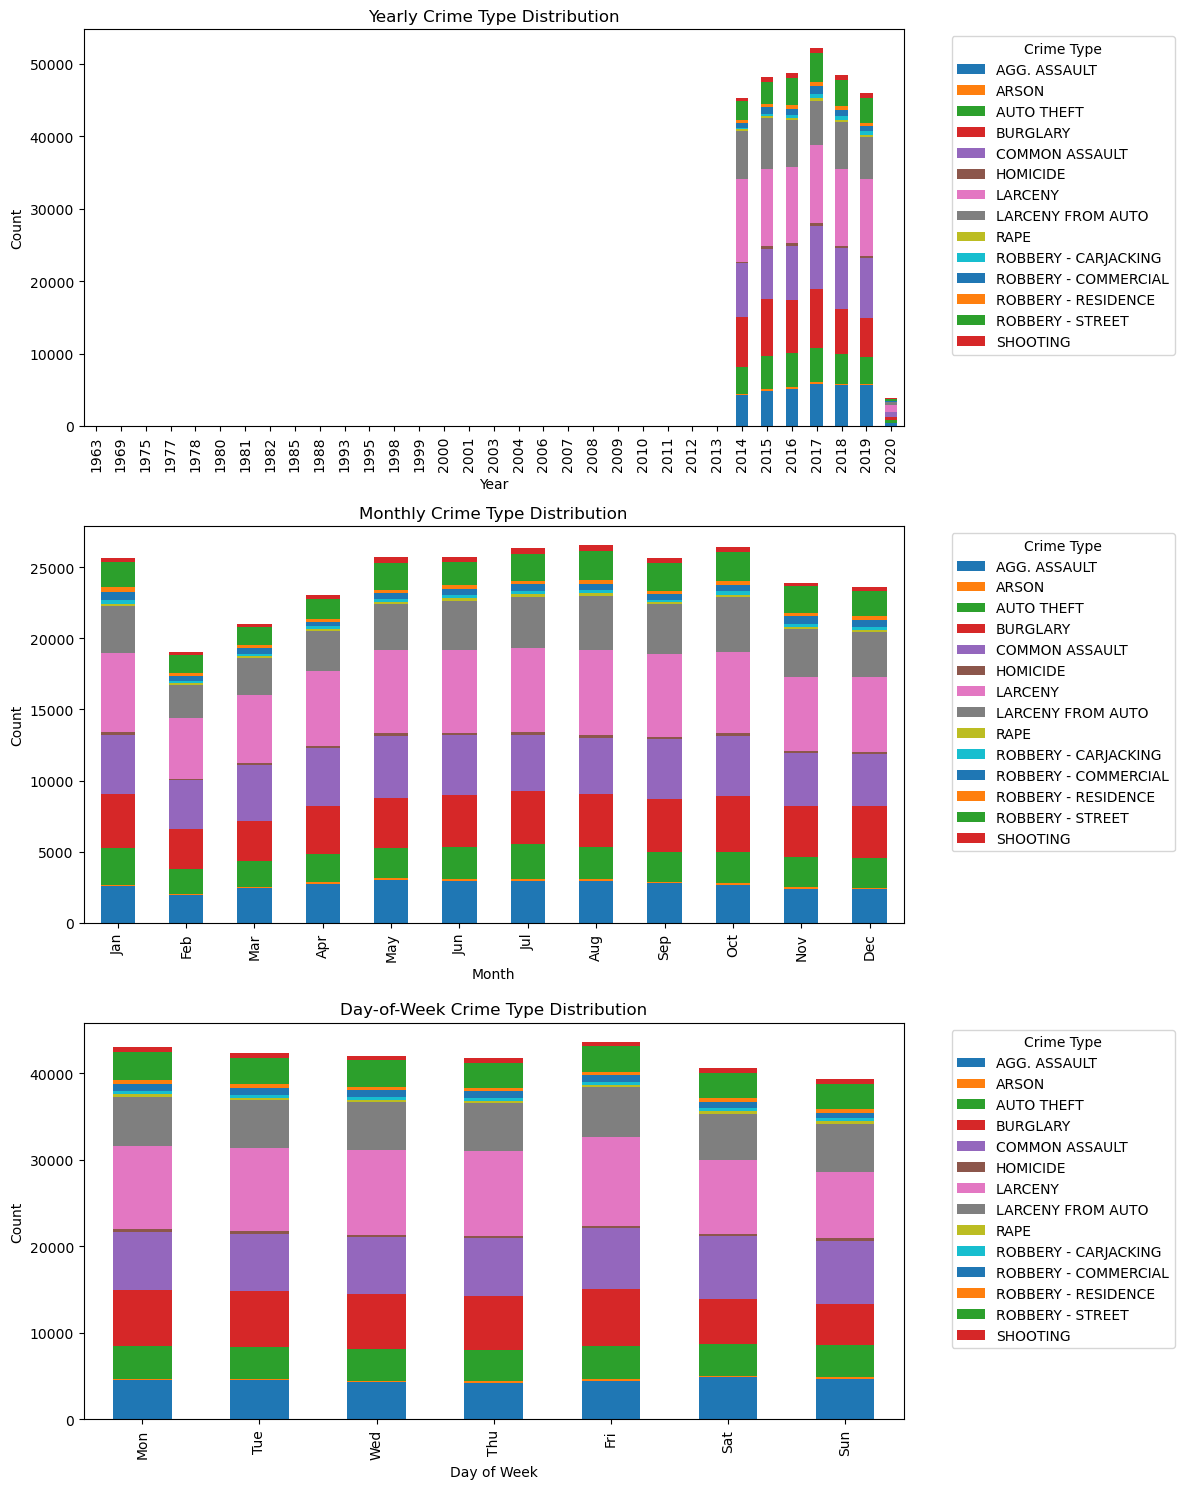

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of week from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create subplots for year-to-year, month-to-month, and day-of-week patterns
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Year-to-Year Pattern
yearly_crime = df.groupby(['Year', 'Description']).size().unstack(fill_value=0)
yearly_crime.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].set_title('Yearly Crime Type Distribution')
axes[0].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Monthly Pattern
monthly_crime = df.groupby(['Month', 'Description']).size().unstack(fill_value=0)
monthly_crime.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')
axes[1].set_title('Monthly Crime Type Distribution')
axes[1].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Day-of-Week Pattern
day_of_week_crime = df.groupby(['DayOfWeek', 'Description']).size().unstack(fill_value=0)
day_of_week_crime.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')
axes[2].set_title('Day-of-Week Crime Type Distribution')
axes[2].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


/var/folders/qg/zknj8z4j47b2wr38lyvvhwh80000gn/T/ipykernel_80647/2400159225.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


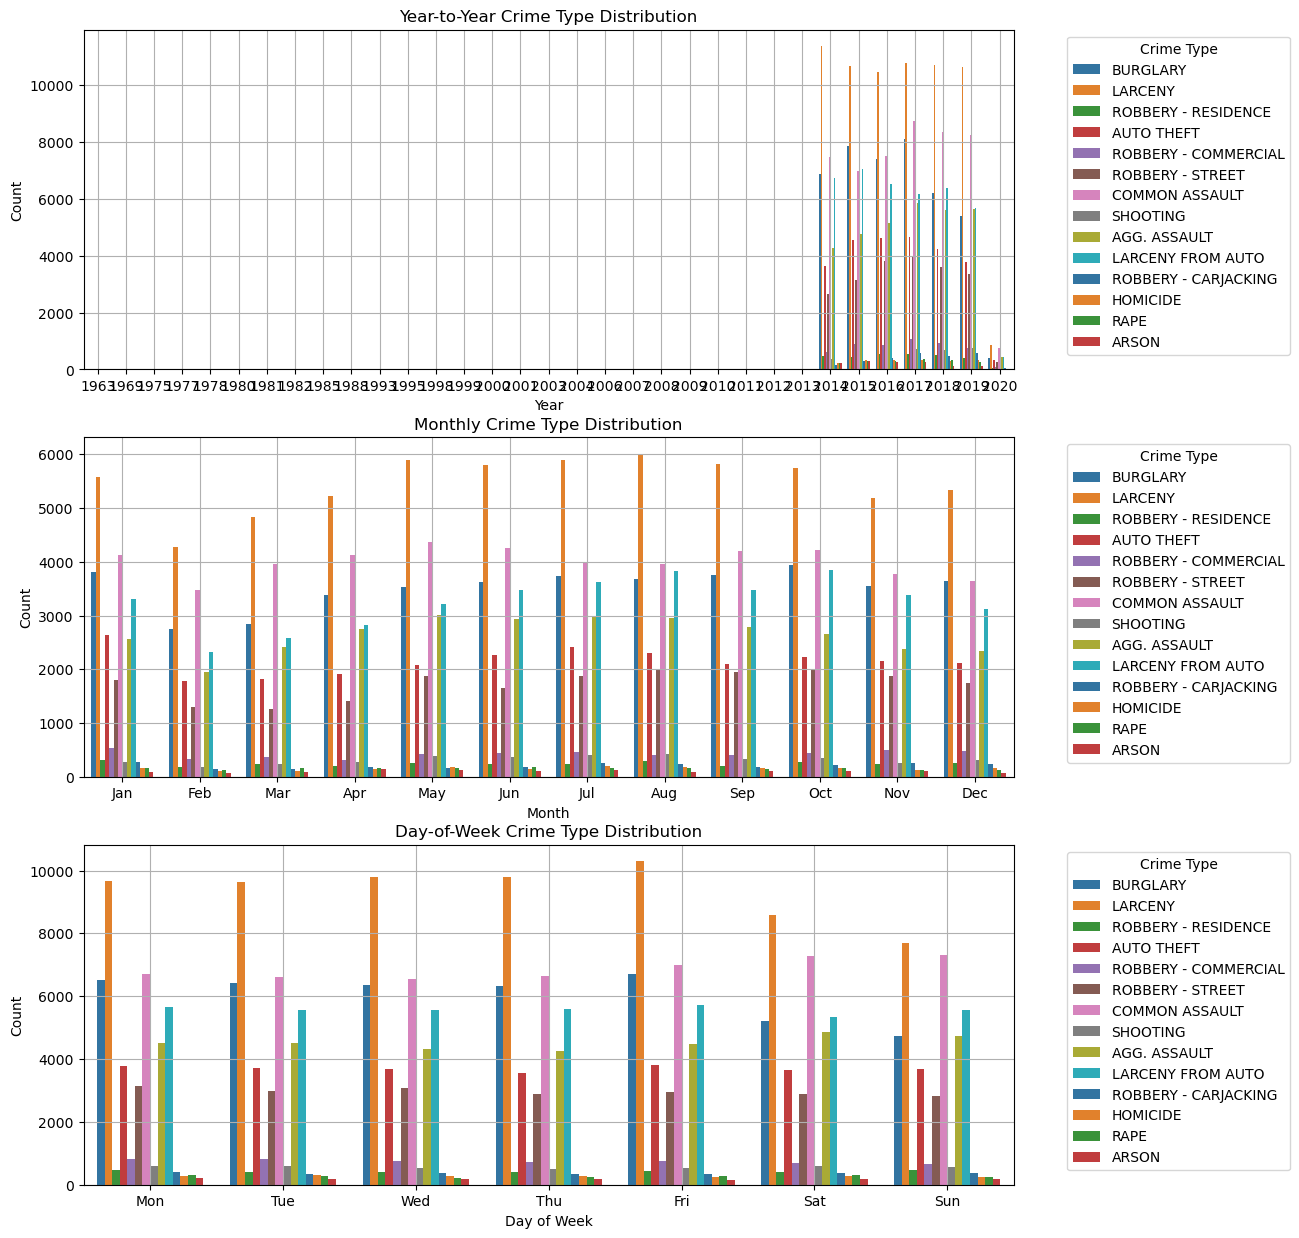

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Baltimore911.csv')

# Convert "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Extract year, month, and day of week from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Choose a different color palette (e.g., 'Set3')
color_palette = sns.color_palette('tab10')

# Create subplots for year-to-year, month-to-month, and day-of-week crime type distributions
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Year-to-Year Crime Type Distribution
sns.countplot(data=df, x='Year', hue='Description', ax=axes[0], palette=color_palette)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].set_title('Year-to-Year Crime Type Distribution')
axes[0].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid()

# Monthly Crime Type Distribution
sns.countplot(data=df, x='Month', hue='Description', ax=axes[1], palette=color_palette)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')
axes[1].set_title('Monthly Crime Type Distribution')
axes[1].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].grid()

# Day-of-Week Crime Type Distribution
sns.countplot(data=df, x='DayOfWeek', hue='Description', ax=axes[2], palette=color_palette)
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Count')
axes[2].set_title('Day-of-Week Crime Type Distribution')
axes[2].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[2].grid()

plt.show()


### A better way to represent year-to-year graph 

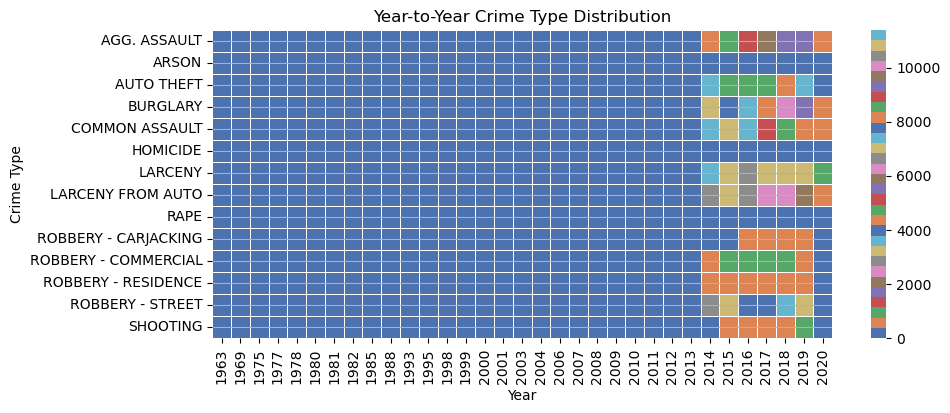

In [17]:
plt.figure(figsize=(10, 4))
num_bins = 30
color_palette = sns.color_palette("deep", num_bins)

yearly_counts = filtered_df.groupby(['Year', 'Description']).size().unstack(fill_value=0)
sns.heatmap(yearly_counts.T, cmap =color_palette, cbar=True, linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Crime Type')
plt.title('Year-to-Year Crime Type Distribution')
plt.grid(axis='y')
plt.show()

##  5. Dashboard 

#### Below is a sample dynamic dashboard which allows users to enter the year and month and the script then generates the day-wise crime graph for that specific month!

Enter the year (e.g., 2010): 2019
Enter the month (1-12): 6


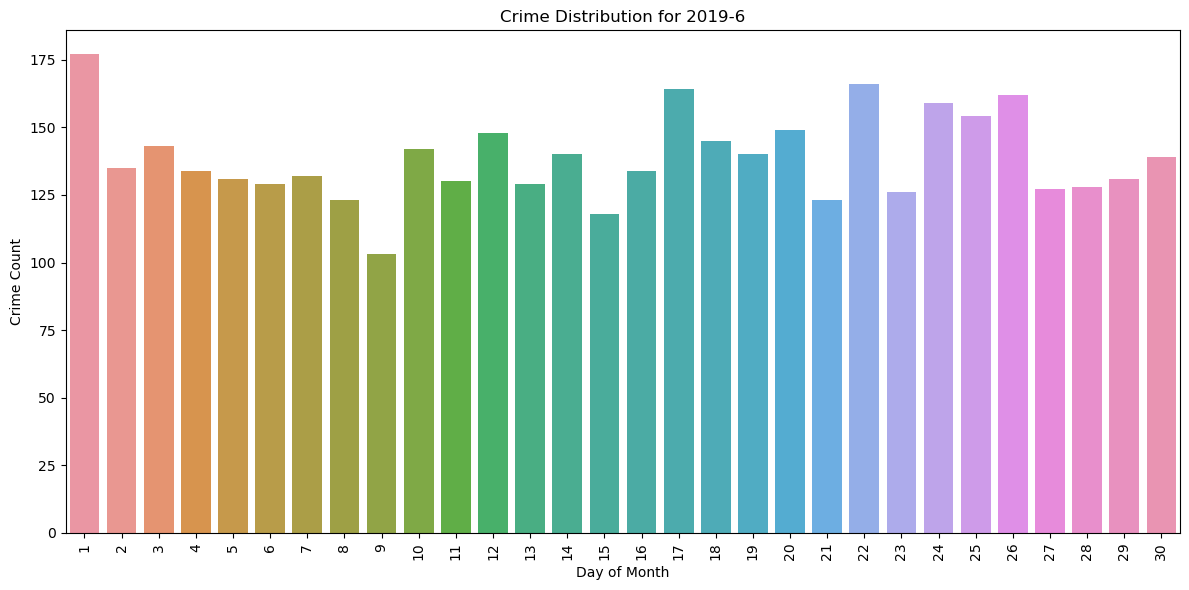

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# User input for year and month
input_year = input("Enter the year (e.g., 2010): ")
input_month = input("Enter the month (1-12): ")

# Filter the dataset based on user input
time_df = filtered_df[(filtered_df['Year'] == int(input_year)) & (filtered_df['Month'] == int(input_month))]

# Create a bar plot of crime counts by day for the selected month and year
plt.figure(figsize=(12, 6))
sns.countplot(data=time_df, x=time_df['CrimeDate'].dt.day)
plt.xlabel('Day of Month')
plt.ylabel('Crime Count')
plt.title(f'Crime Distribution for {input_year}-{input_month}')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()
